In [546]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

if not os.path.exists("images"):
    os.mkdir("images")

# Import and merge datasets

In [547]:
df = pd.read_csv('data/athleteEvents.csv')
country = pd.read_excel('data/olympic_city_country.xlsx')
place = pd.read_csv('data/nocRegions.csv')

place = place.drop(['region', 'notes'],axis=1)
newdf1 = df.merge(place, how='right')

gpd = pd.read_excel('data/Gapminder GDP data.xlsx',sheet_name='countries_and_territories')

# data pre-processing 

In [548]:
df = newdf1.dropna(subset=['Year','Games'])
df['Team']= df['Team'].str.replace('[#,@,&,0-9]', '',regex=True)
df['City']= df['City'].str.replace('[#,@,&,0-9]', '',regex=True)
df['Team'] = df['Team'].str.lower()
df['City'] = df['City'].str.lower()

country['City'] = country['City'].str.replace(r'[#,@,&,0-9]', '', regex=True)
country['City'] = country['City'].str.lower()

country['Country'] = country['Country'].str.replace(r'[#,@,&,0-9]', '', regex=True)
country['Country'] = country['Country'].str.lower()

gpd['Country Name'] = gpd['Country Name'].str.replace(r'[#,@,&,0-9]', '', regex=True)
gpd['Country Name'] = gpd['Country Name'].str.lower()

<ipython-input-548-fca826fa2fa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-548-fca826fa2fa8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-548-fca826fa2fa8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-548-fca826fa2

In [549]:
# change great britain to united kingdom
df['Team'][df['Team']=='great britain']='united kingdom'

<ipython-input-549-4e7fe9a19bd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-549-4e7fe9a19bd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [550]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
dtype: int64

In [551]:
df=df.fillna(0)

## medal 

In [552]:
pd.unique(df['Medal'].values)

array([0, 'Bronze', 'Silver', 'Gold'], dtype=object)

In [553]:
len(pd.unique(df['NOC'].values))

229

## years

In [554]:
print(pd.unique(df['Year']))
print( "lenght is " , len(pd.unique(df['Year'])))

[1956. 1936. 1948. 1980. 1964. 1972. 1968. 2004. 2008. 2012. 2016. 1988.
 1960. 1996. 1984. 1952. 1992. 2000. 1976. 2014. 2006. 2010. 2002. 1994.
 1998. 1908. 1912. 1924. 1928. 1932. 1900. 1920. 1906. 1896. 1904.]
lenght is  35


In [555]:
df92=df[df['Year']==1900]
df20=df[df['Year']==2012]

In [556]:
pM = len(df92[df92["Sex"]=='M'])/(len(df92[df92["Sex"]=='M'])+len(df92[df92["Sex"]=='F']))
PF= len(df92[df92["Sex"]=='F'])/(len(df92[df92["Sex"]=='M'])+len(df92[df92["Sex"]=='F']))
print('Pourcentage of man', pM , " pourcentage of femel", PF)

Pourcentage of man 0.9829545454545454  pourcentage of femel 0.017045454545454544


In [557]:
dt= {"Sex":["M","F"],'participation pourcentage':[pM,PF],"Year":[1900,1900]}
dt=pd.DataFrame(dt)
dt

,Sex,participation pourcentage,Year
0,M,0.982955,1900
1,F,0.017045,1900


In [558]:
PM = len(df20[df20["Sex"]=='M'])/(len(df20[df20["Sex"]=='M'])+len(df20[df20["Sex"]=='F']))
pF= len(df20[df20["Sex"]=='F'])/(len(df20[df20["Sex"]=='M'])+len(df20[df20["Sex"]=='F']))
print('Pourcentage of man', pM , " pourcentage of femel", PF)

Pourcentage of man 0.9829545454545454  pourcentage of femel 0.017045454545454544


In [559]:
dt2= {"Sex":["M","F"],'participation pourcentage':[PM,pF],"Year":[2012,2012]}
dt2=pd.DataFrame(dt2)
dt2

,Sex,participation pourcentage,Year
0,M,0.550528,2012
1,F,0.449472,2012


# Slopgraph

In [560]:

frames = [dt2, dt]
result = pd.concat(frames,axis=0)
result
fm= result[result['Sex']=='M']
ff= result[result['Sex']=='F']

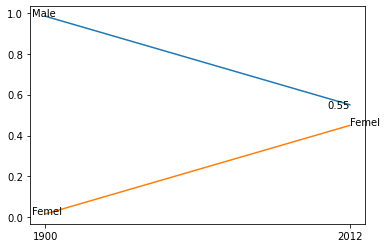

In [561]:
plt.plot(fm['Year'], fm['participation pourcentage'])
plt.plot(ff['Year'], ff['participation pourcentage'])
plt.xticks([1900, 2012])
plt.text(fm['Year'].values[0]+0.02, fm['participation pourcentage'].values[0], '{:,.2f}'.format(fm['participation pourcentage'].values[0]), va='center', ha='right')
plt.text(ff['Year'].values[0]+0.02, ff['participation pourcentage'].values[0], 'Femel')
plt.xticks([1900, 2012])
plt.text(fm['Year'].values[-1]-5, fm['participation pourcentage'].values[-1], 'Male')
plt.text(ff['Year'].values[-1]-5, ff['participation pourcentage'].values[-1], 'Femel')

plt.show()

https://news.ubc.ca/2014/09/30/gender-equality-olympics/

## Pourcentage of medal wont by each gender

In [562]:
l =df.groupby(['Sex', 'Year','Medal']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count','Medal']]
l.head()

,Sex,Year,count,Medal
0,F,1900.0,20,0
1,F,1900.0,5,Bronze
2,F,1900.0,4,Gold
3,F,1900.0,4,Silver
4,F,1904.0,6,0


In [563]:
dfm= l[l['Year']==1900]
dfm.groupby(['Sex'])['count'].sum()

Sex
F      33
M    1903
Name: count, dtype: int64

In [564]:
dfm=dfm[dfm['Medal']!=0]
dfm.groupby(['Sex'])['count'].agg('sum')


Sex
F     13
M    591
Name: count, dtype: int64

In [565]:
dfm2= l[l['Year']==2012]
dfm2.groupby(['Sex'])['count'].sum()

Sex
F    5791
M    7093
Name: count, dtype: int64

In [566]:
dfm2=dfm2[dfm2['Medal']!=0]
print(dfm2.groupby(['Sex'])['count'].agg('sum'))

Sex
F     914
M    1023
Name: count, dtype: int64


In [567]:
dfm2= l[l['Year']==2012]
print(dfm2.groupby(['Sex'])['count'].sum())
dfm2=dfm2[dfm2['Medal']!=0]
print(dfm2.groupby(['Sex'])['count'].sum())

Sex
F    5791
M    7093
Name: count, dtype: int64
Sex
F     914
M    1023
Name: count, dtype: int64


explore the slopgraphe and the percentage to compare the percentage of femel and male participation during the time.
the pourcentage of medal from past to know. I will then explore the same direction for the country with most number of medail and also the country with less number of medail.  
If possible, show the distribution of medal get by both gender in the word map.  To get which country could affect the gender performance in the olympic game.  

<AxesSubplot:xlabel='Sex', ylabel='count'>

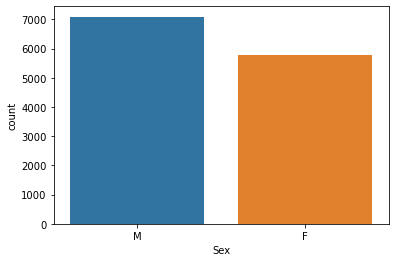

In [568]:
sns.countplot(data=df20, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

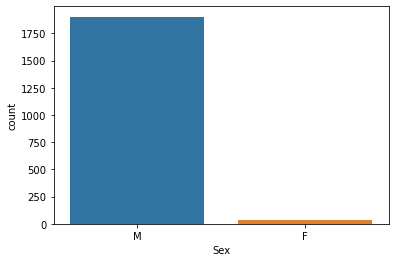

In [569]:
sns.countplot(data=df92, x='Sex')


**count the total number of men and winen who participate to the onlympic and show the number of medal got per gender.**

In [570]:
l =df.groupby(['Sex', 'Year']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count']]

In [571]:
l['Year'] = l['Year'].astype(int)
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     69 non-null     object
 1   Year    69 non-null     int64 
 2   count   69 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


<AxesSubplot:xlabel='Year', ylabel='count'>

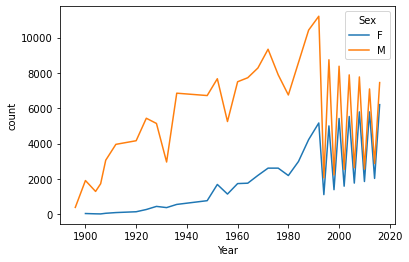

In [572]:
sns.lineplot(data=l, x='Year',y='count',hue='Sex')

In [573]:
l =df.groupby(['Sex', 'Year','Medal']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count','Medal']]
l

,Sex,Year,count,Medal
0,F,1900.0,20,0
1,F,1900.0,5,Bronze
2,F,1900.0,4,Gold
3,F,1900.0,4,Silver
4,F,1904.0,6,0
...,...,...,...,...
271,M,2014.0,110,Silver
272,M,2016.0,6400,0
273,M,2016.0,372,Bronze
274,M,2016.0,346,Gold


<AxesSubplot:xlabel='Year', ylabel='count'>

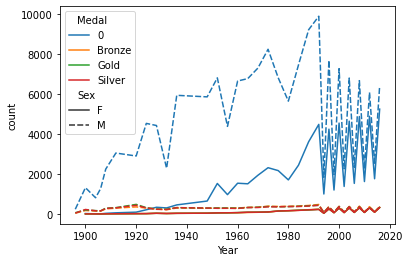

In [574]:
sns.lineplot(data=l, x='Year',y='count',hue='Medal',style='Sex')

In [575]:
l=l[l['Year']>=1990]

<AxesSubplot:xlabel='Year', ylabel='count'>

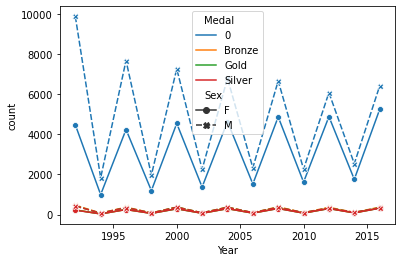

In [576]:
sns.lineplot(data=l, x='Year',y='count',hue='Medal',style='Sex',markers=True)

# How does age and gender affect olympic sports performance?

# Does location really affect an athlete performance?

# How sport Location Affects athlete Performance?

# How does the athlete with more medal evolve in year?

**1. What effect does the host country have in the medals won at the Olympics?**

**2. Is the performance of countries in Olympic games affected by the economic factors of the country?**

**3. Is the age of winning Olympics changing?**

# Number of  olympic games host by country

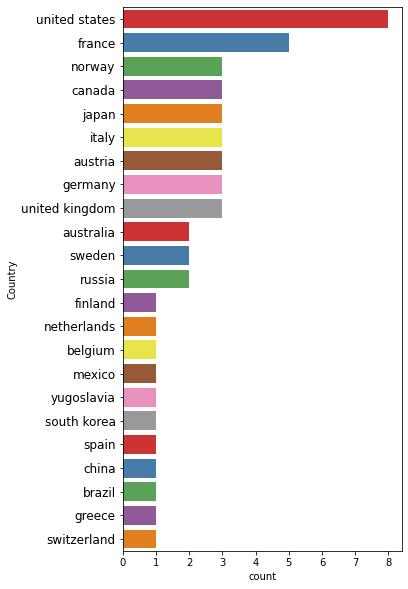

In [577]:
tmp = df.groupby(['City'])['Season'].value_counts()
df4 = pd.DataFrame(data={'Medal': tmp.values}, index=tmp.index).reset_index()

newdf = df4.merge(country, how='right').dropna()
plt.figure(figsize=(5,10))
sns.countplot(data=newdf, y='Country', palette='Set1', order = newdf['Country'].value_counts().index)
plt.yticks( 
    horizontalalignment='right',
    fontsize='large'  
)
plt.show()

In [578]:
cont = newdf.groupby('Country')['Country'].value_counts()
l = pd.unique(newdf['Country'].sort_values())
pfd = pd.DataFrame({'Team':l, 'count':cont.values})




#  Does hosting the Olympic games and the country's economy affect its performance?


## Top 12 world countries that have won more medial and organized at least one Olympic game.

In [579]:
import plotly.express as px
import plotly.io as pio

In [590]:
cont = newdf.groupby('Country')['Country'].value_counts()
l = pd.unique(newdf['Country'].sort_values())
pfd = pd.DataFrame({'Team':l, 'count':cont.values})
tmp = df.groupby(['Team'])['Medal'].agg('count').dropna()
df5 = pd.DataFrame(tmp).reset_index()

l = df5.merge(pfd, how='right').dropna()
l =l.sort_values(by=['Medal'],ascending=False)
l["count"] = l["count"].astype("category")
l = l.head(12)
pg =gpd[gpd['Country Name'].isin(list(l['Team']))]
pg = pg.sort_values(by=[2016,2015],ascending=False)
pfd = pd.DataFrame({'Team':list(pg['Country Name'].head(12)), 'Oder':[i for i in range(1,13)]})
ll = l.merge(pfd, how='right').dropna()
ll =ll.sort_values(by=['Medal'],ascending=False)

fig = px.bar(ll, x="Medal", y="Team", color="count",text='Medal',base='Oder',color_continuous_scale='Oder',
             title="Top 12 world countries that have won more medal and organized at \nleast one Olympic game.",
labels={ # replaces default labels by column name
                "count": "Number of Olympic games organized"
            })
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(yaxis=dict(autorange="reversed"), legend_title_font_color="black",
                  font_color="black",
    title_font_color="black",)
fig.update_yaxes(title_text='')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor='bottom',
    y=1.02,
    xanchor="right",
    x=0.9
))
fig.show()
pio.write_image(fig, "top12.png")


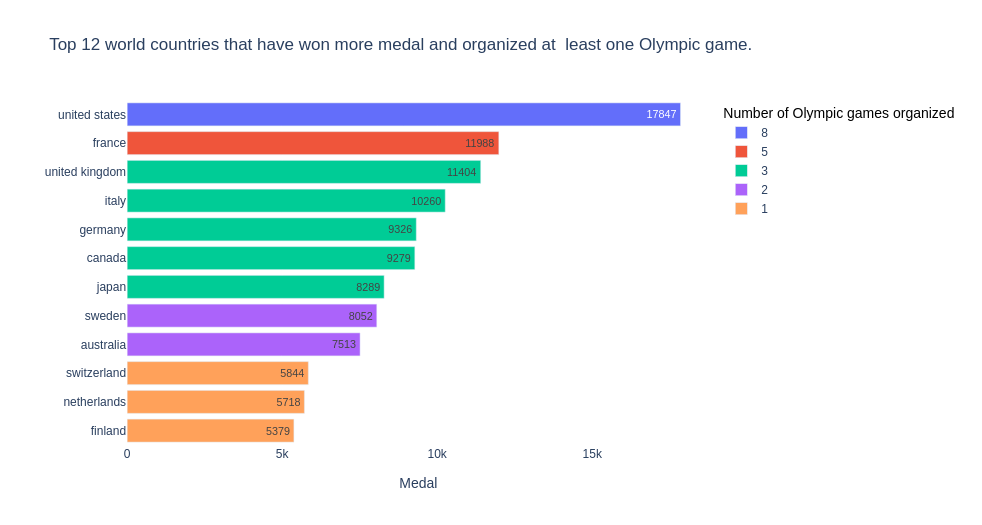

In [581]:
gpd

,Country Name,1896,1897,1898,1899,1900,1901,1902,1903,1904,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,afghanistan,782,785,788,790,793,796,798,801,804,...,1285,1298,1531,1614,1661,1839,1814,1780,1748,1740
1,albania,1094,1109,1125,1140,1156,1172,1187,1203,1219,...,8448,9154,9525,9927,10208,10370,10504,10715,11025,11425
2,algeria,1675,1693,1711,1730,1749,1768,1787,1807,1826,...,12570,12660,12647,12870,12990,13162,13253,13483,13724,13975
3,andorra,3048,3084,3121,3158,3195,3233,3272,3310,3350,...,43442,41426,41735,38982,41958,41926,43735,44930,46578,48186
4,angola,941,946,950,954,958,962,967,971,975,...,5443,5978,5908,5895,5911,5999,6185,6260,6231,6025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,vietnam,1043,1052,1061,1070,1079,1089,1098,1108,1117,...,3907,4085,4260,4486,4716,4910,5122,5370,5667,5955
198,yemen,1151,1154,1157,1160,1164,1167,1170,1174,1177,...,4192,4228,4273,4479,3805,3793,3873,3767,2641,2325
199,zambia,836,838,841,843,845,847,849,851,853,...,2749,2882,3060,3279,3361,3509,3577,3633,3627,3636
200,zimbabwe,975,977,978,979,980,981,983,984,985,...,1494,1209,1290,1460,1663,1848,1901,1908,1891,1860


In [582]:
pg =gpd[gpd['Country Name'].isin(list(l['Team']))]
pg = pg.sort_values(by=[2016,2015],ascending=False)
pfd = pd.DataFrame({'Team':list(pg['Country Name'].head(12)), 'Oder':[i for i in range(1,13)]})
ll = l.merge(pfd, how='right').dropna()

In [583]:

ll = l.merge(pfd, how='right').dropna()

In [584]:
pg

,Country Name,1896,1897,1898,1899,1900,1901,1902,1903,1904,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
172,switzerland,8883,9233,9290,9637,9634,9414,9511,9209,9578,...,55849,56399,54513,55542,55919,55908,56253,56680,56511,56625
191,united states,5834,6276,6296,6748,6816,7438,7368,7585,7352,...,51011,50384,48558,49373,49791,50520,51008,51831,52790,53273
128,netherlands,6161,6222,6224,6220,6060,6256,6416,6305,6292,...,46528,47134,45126,45525,46067,45411,45191,45668,46354,47128
171,sweden,3153,3277,3389,3473,3487,3578,3532,3718,3782,...,44051,43466,40863,42943,43755,43308,43476,44168,45488,46441
9,australia,6134,5694,6479,6394,6685,6395,6369,6792,7157,...,40650,41317,41207,41385,41782,42561,42920,43396,43832,44414
66,germany,4214,4268,4382,4470,4594,4420,4454,4632,4748,...,40474,40989,38784,40429,42693,42822,42914,43418,43784,44072
32,canada,3814,4187,4307,4662,4855,5165,5557,5562,5473,...,41647,41611,39924,40699,41565,41795,42336,42946,42983,43088
61,finland,2622,2713,2787,2685,2788,2734,2660,2818,2894,...,42467,42575,38868,39848,40684,39913,39428,39018,38994,39423
190,united kingdom,7625,7638,7904,8108,8008,8103,8156,8014,8038,...,38236,37698,35795,36196,36456,36679,37130,37983,38509,38901
88,japan,1650,1664,1954,1785,1839,1878,1754,1849,1839,...,36697,36278,34318,35750,35775,36368,37149,37323,37818,38240


In [585]:
pfd

,Team,Oder
0,switzerland,1
1,united states,2
2,netherlands,3
3,sweden,4
4,australia,5
5,germany,6
6,canada,7
7,finland,8
8,united kingdom,9
9,japan,10


## Top African countries that have won more medail 

<Figure size 360x720 with 0 Axes>

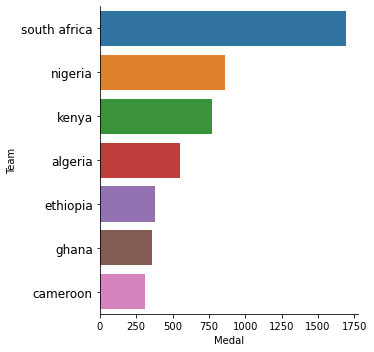

In [586]:
tmp = df.groupby(['Team'])['Medal'].agg('count').dropna()
df5 = pd.DataFrame(tmp).reset_index()
l =df5.sort_values(by=['Medal'],ascending=True)
l = l[(l['Team'] =='cameroon' )| (l['Team'] =='nigeria')| (l['Team'] =='algeria')|(l['Team'] =='south africa')| (l['Team'] =='kenya')|(l['Team'] =='ethiopia')|(l['Team'] =='ghana' )]
#l = l.head(12)
o = l.sort_values(by=['Medal'],ascending=False)
plt.figure(figsize=(5,10))
sns.catplot(data=o, x="Medal", y="Team", kind="bar")
plt.yticks( 
    horizontalalignment='right',
    fontsize='large'  
)
plt.show()

In [587]:
#need to check, something is wrong

**If the Olympic performance of the riches countries is affected by the place where the games were organised. Therefore what about the country that can not organise the Olympic games?**

# Trend of the nomber of medal for the 10 top countries that have gain more medal

In [479]:
tmp = df.groupby(['Year', 'Team', 'City'])['Medal'].agg('count').dropna()
df6 = pd.DataFrame(tmp).reset_index()
l =df6.sort_values(by=['Medal'],ascending=False)
newdfl = l.merge(country, how='right').dropna()
newdfl = newdfl.sort_values(by=['Year'])
df8= newdfl.copy()

In [480]:

#newdfl= newdfl[newdfl['Year']>2000]

for i in pd.unique(newdfl['Country']):
    place =np.array([])
    for j in range(len(newdfl['Country'])):
        if(newdfl['Country'].iloc[j]==i):
            place = np.append(place,str('home'))
        else:
            place = np.append(place,str('away'))
    df8[i]=list(place)
            


In [481]:
df8

,Year,Team,City,Medal,Country,greece,france,united states,united kingdom,sweden,...,japan,austria,mexico,canada,russia,yugoslavia,south korea,spain,china,brazil
6267,1896.0,austria,athina,8.0,greece,home,away,away,away,away,...,away,away,away,away,away,away,away,away,away,away
6266,1896.0,switzerland,athina,8.0,greece,home,away,away,away,away,...,away,away,away,away,away,away,away,away,away,away
6185,1896.0,united kingdom,athina,23.0,greece,home,away,away,away,away,...,away,away,away,away,away,away,away,away,away,away
6278,1896.0,greece-,athina,6.0,greece,home,away,away,away,away,...,away,away,away,away,away,away,away,away,away,away
6294,1896.0,sweden,athina,5.0,greece,home,away,away,away,away,...,away,away,away,away,away,away,away,away,away,away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5820,2016.0,vietnam,rio de janeiro,28.0,brazil,away,away,away,away,away,...,away,away,away,away,away,away,away,away,away,home
5821,2016.0,indonesia,rio de janeiro,27.0,brazil,away,away,away,away,away,...,away,away,away,away,away,away,away,away,away,home
5822,2016.0,angola,rio de janeiro,26.0,brazil,away,away,away,away,away,...,away,away,away,away,away,away,away,away,away,home
5824,2016.0,uganda,rio de janeiro,23.0,brazil,away,away,away,away,away,...,away,away,away,away,away,away,away,away,away,home


# parallel plot

In [ ]:

newdfl= newdfl[newdfl['Year']>2000]

for i in pd.unique(newdfl['Country']):
    place =np.array([])
    for j in range(len(newdfl['Country'])):
        if(newdfl['Country'].iloc[j]==i):
            place = np.append(place,str('home'))
        else:
            place = np.append(place,str('away'))
    break
            


In [ ]:
len(place)

In [127]:

temp = newdfl[newdfl['Team']==i]
temp= temp.drop_duplicates()
temp

,Year,Team,City,Medal,Country
4598,2002.0,united states,salt lake city,285.0,united states
6084,2004.0,united states,athina,706.0,greece
6456,2006.0,united states,torino,295.0,italy
4694,2008.0,united states,beijing,744.0,china
4957,2010.0,united states,vancouver,303.0,canada
1580,2012.0,united states,london,669.0,united kingdom
5555,2014.0,united states,sochi,333.0,russia
5740,2016.0,united states,rio de janeiro,699.0,brazil


In [128]:
from pandas.plotting import parallel_coordinates

In [129]:
tem = temp[['Medal']]

In [130]:
l =tem.T
l.columns = temp['Year']
l['label'] = ['Medal']

<AxesSubplot:>

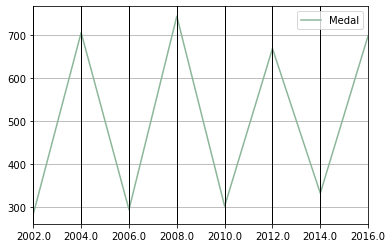

In [131]:
parallel_coordinates(l, "label")

In [132]:
from plotnine import*

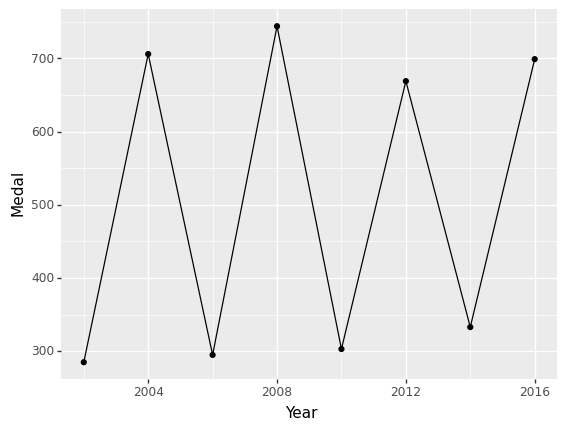

<ggplot: (8739887306635)>

In [133]:

ggplot(temp)+aes(x='Year', y= 'Medal') + geom_point()+geom_line()

1. Host Country Effect- What is the probability that a participant of the host country can win a medal? Are there any type of sports that the host country has more chance of winning?

2. Economic Effect- Are there any sports that are won mostly by countries with low GDP? Does the rise/fall in economy affect the Olympic winnings of a country, and if so, in how many years is the effect seen?

3. Age Effect- Does the Relative Age Effect influence Olympic winnings? At what age is optimum age for each sport? How does the performance of each athlete improve/degrade over time?

Moreover, looking at the medals count in Olympics official site[4] and comparing with the Olympics history dataset used in this report, there are discrepancies, hence the dataset needs to be revised.